In [1]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Overview

In [2]:
# load data 
df = pd.read_csv('melb_data.csv')

In [3]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Outlier Detection

In [4]:
# split numeric and object data
df_num = df.select_dtypes(include = ['int64','float64'])

> Outlier hanya bisa dideteksi pada data yang bertipe numerikal,oleh karena itu kita perlu memisahkan data object atau string dan datetime.

## 1.Boxplot

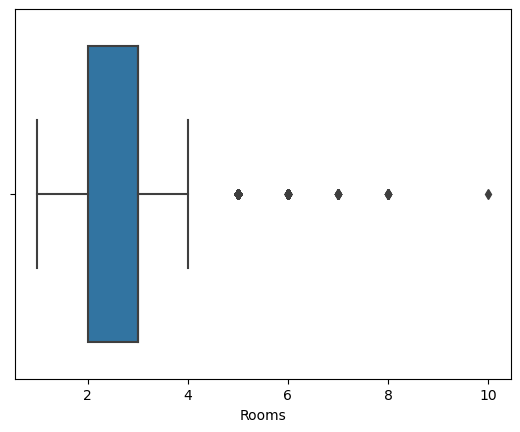

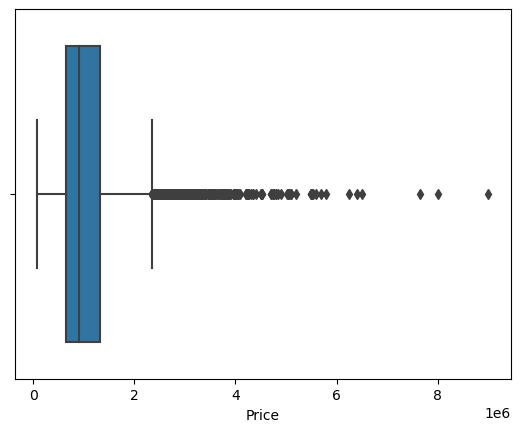

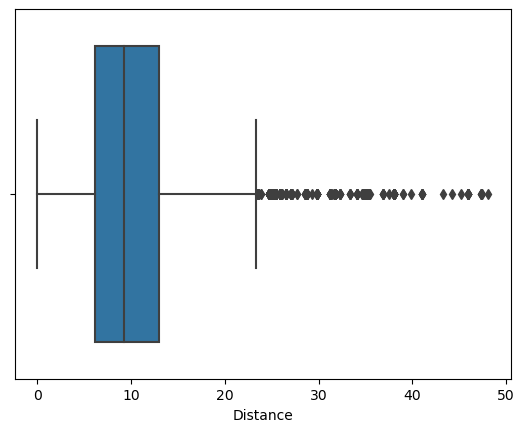

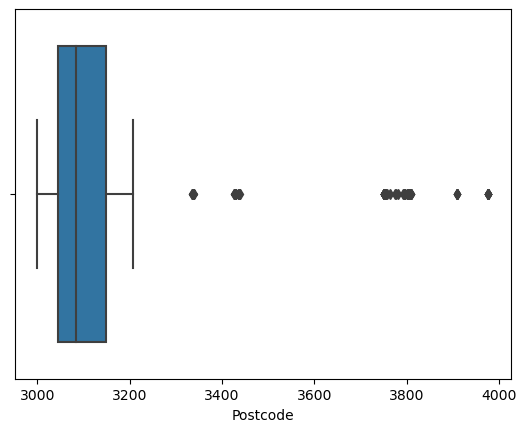

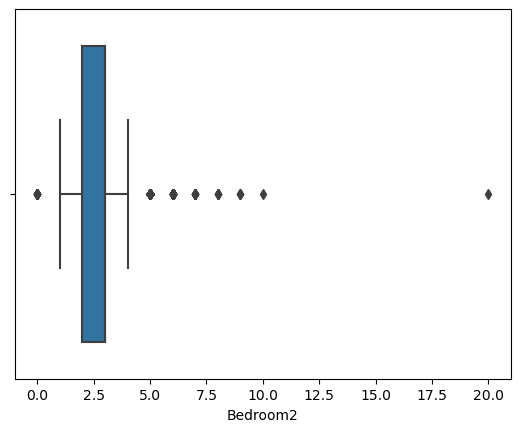

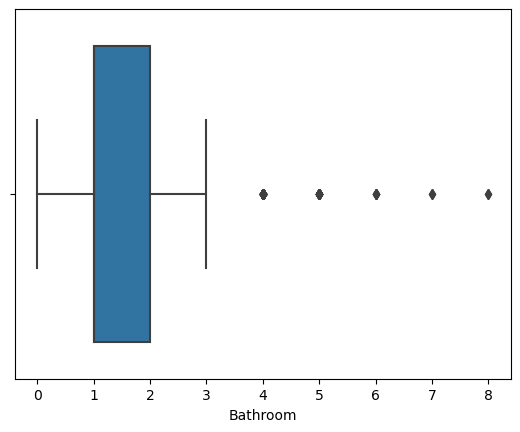

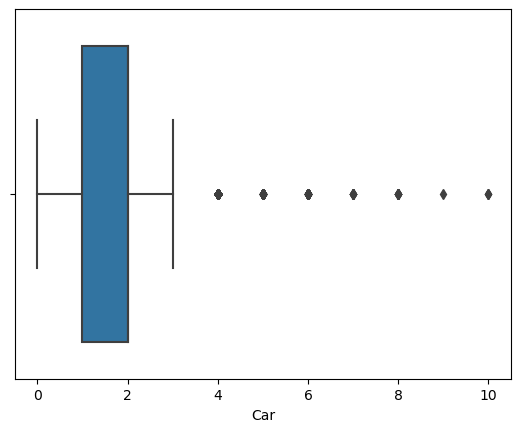

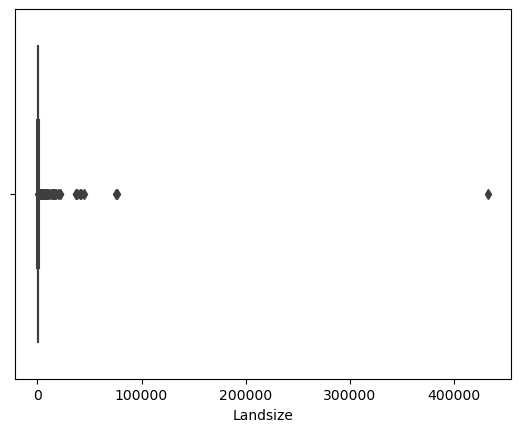

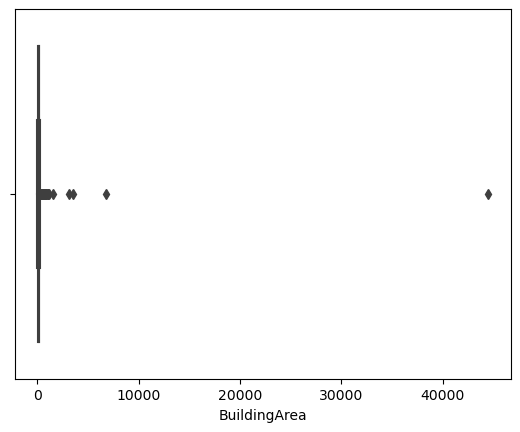

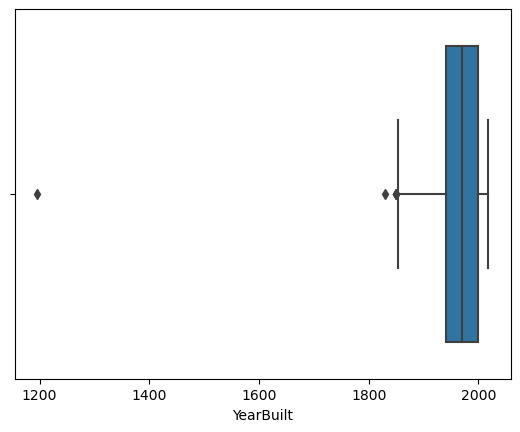

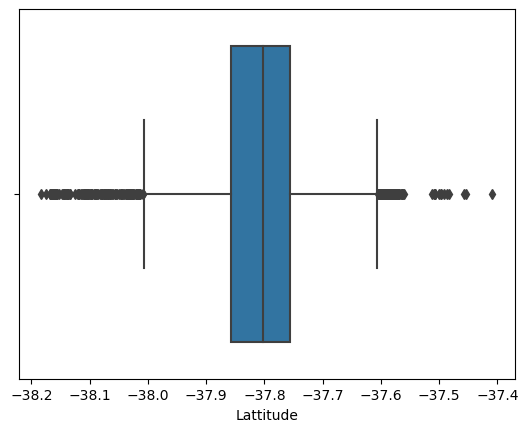

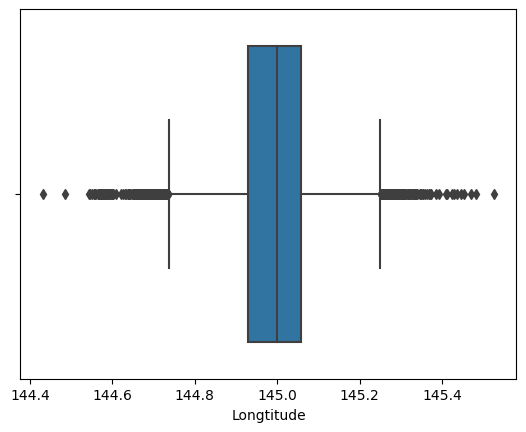

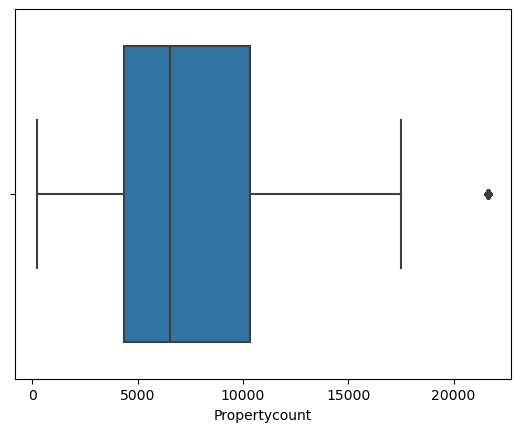

In [5]:
# detecting using boxplot
for i in df_num:
    sns.boxplot(data=df_num,x=i)
    plt.show()

> we have find outlier in these column using boxplot methode.
we will handle this, later.

## 2. IQR

In [6]:
# function to find outlier using numpy
def find_outlier(YourList):
    Q1 = np.quantile(YourList, .25)
    Q2 = np.quantile(YourList, .50) # median
    Q3 = np.quantile(YourList, .75)
    
    IQR = (Q3-Q1) * 1.5
    batas_bawah = Q1-IQR
    batas_atas = Q3+IQR
    
    outlier = ''
    for i in range (len(YourList)):
        if YourList[i] > batas_atas:
            outlier = outlier+str(YourList[i]) + ','
        if YourList[i] < batas_bawah:
            outlier = outlier+str(YourList[i]) + ','
    return outlier

In [7]:
distance = df['Distance'].sort_values().values.tolist()
print('jumlah outlier feature distance yaitu :', len(find_outlier(distance)))

jumlah outlier feature distance yaitu : 2055


In [8]:
price = df['Price'].sort_values().values.tolist()
print('jumlah outlier Price distance yaitu :', len(find_outlier(price)))

jumlah outlier Price distance yaitu : 6120


> Dengan cara IQR kita dapat mengetahui jumlah outlier pada suatu kolom.terlihat jumlah outliernya pada kolom distance:2055 dan price 6120.

In [9]:
# function to find outlier using numpy
def find_outlier2(data):
    
    # hitung nilai Q1 dan Q3
    Q1 = np.quantile(data, .25)
    Q3 = np.quantile(data, .75)
    
    # hitung nilai IQR
    IQR = Q3-Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 - 1.5 * IQR
    
    nilai_min = np.min(data)
    nilai_max = np.max(data)
    
    low_out = []
    high_out = []
    
    for i in data:
        if (i<min_IQR):
            low_out.append(i)
        if (i>max_IQR):
            high_out.append(i)
    
    return print('lower outlier :',low_out, '|| higher outlier :',high_out)

In [10]:
# find outliers in distance variable
print(find_outlier2(distance))

lower outlier : [] || higher outlier : [2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.1, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.2, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 3.3, 

In [11]:
# find outliers in price variable
print(find_outlier2(price))

lower outlier : [] || higher outlier : [311500.0, 312000.0, 312000.0, 312000.0, 313000.0, 314000.0, 315000.0, 315000.0, 315000.0, 315000.0, 315000.0, 315000.0, 315000.0, 315000.0, 315000.0, 315000.0, 315000.0, 316000.0, 316000.0, 316000.0, 317500.0, 319000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320000.0, 320500.0, 320500.0, 321000.0, 322500.0, 323000.0, 323000.0, 324000.0, 325000.0, 325000.0, 325000.0, 325000.0, 325000.0, 325000.0, 326000.0, 326000.0, 326000.0, 326500.0, 327000.0, 327000.0, 327000.0, 328000.0, 328000.0, 328000.0, 328500.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 330000.0, 331000.0, 331000.0, 331000.0, 332000.0, 333000.0, 333000.0, 

> Cara IQR juga bisa kita gunakan untuk melihat values dari outliernya.

### 3. z-score

> Metode Z-score juga bisa digunakan untuk mengetahui outlier atau tidak.akan tetapi, kita perlu mengethui index dari nilai values outliernya sehingga kita bisa handling outlier, dan itu berlaku untuk semua cara seperti IQR.

In [12]:
# import scipy.stats as new library for z score
from scipy import stats

In [13]:
# z-score sheck
z = np.abs(stats.zscore(distance))

# thereshold = 2.5
print(np.where(z >2.5))
print(np.where(z <-2.5))

(array([13232, 13233, 13234, 13235, 13236, 13237, 13238, 13239, 13240,
       13241, 13242, 13243, 13244, 13245, 13246, 13247, 13248, 13249,
       13250, 13251, 13252, 13253, 13254, 13255, 13256, 13257, 13258,
       13259, 13260, 13261, 13262, 13263, 13264, 13265, 13266, 13267,
       13268, 13269, 13270, 13271, 13272, 13273, 13274, 13275, 13276,
       13277, 13278, 13279, 13280, 13281, 13282, 13283, 13284, 13285,
       13286, 13287, 13288, 13289, 13290, 13291, 13292, 13293, 13294,
       13295, 13296, 13297, 13298, 13299, 13300, 13301, 13302, 13303,
       13304, 13305, 13306, 13307, 13308, 13309, 13310, 13311, 13312,
       13313, 13314, 13315, 13316, 13317, 13318, 13319, 13320, 13321,
       13322, 13323, 13324, 13325, 13326, 13327, 13328, 13329, 13330,
       13331, 13332, 13333, 13334, 13335, 13336, 13337, 13338, 13339,
       13340, 13341, 13342, 13343, 13344, 13345, 13346, 13347, 13348,
       13349, 13350, 13351, 13352, 13353, 13354, 13355, 13356, 13357,
       13358, 13359

In [14]:
# where is data?
# finding location
outlier_loc = [13241, 13242, 13243, 13244, 13245, 13246, 1324]

In [15]:
# finding outlier using loop
outlier_data =[]
for i in range(len(outlier_loc)):
    outlier_data.append(distance[i])

In [16]:
# finding outlier using loop
outlier_data

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7]

In [17]:
# finding outlier using loc
df.loc[outlier_loc]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13241,Mulgrave,9 Caledonia Cr,3,h,1105000.0,S,Ray,23/09/2017,18.8,3170.0,...,2.0,2.0,843.0,NaN,NaN,NaN,-37.93041,145.16024,South-Eastern Metropolitan,7113.0
13242,Mulgrave,5 Lola St,5,h,880000.0,PI,SN,23/09/2017,18.8,3170.0,...,3.0,2.0,654.0,NaN,1960.0,NaN,-37.92914,145.17372,South-Eastern Metropolitan,7113.0
13243,Mulgrave,25 Rupert Dr,3,h,840000.0,S,Ray,23/09/2017,18.8,3170.0,...,1.0,2.0,656.0,107.0,1972.0,NaN,-37.93271,145.17792,South-Eastern Metropolitan,7113.0
13244,Murrumbeena,21 Reid St,3,h,1321188.0,SP,Woodards,23/09/2017,10.1,3163.0,...,1.0,1.0,586.0,200.0,1945.0,NaN,-37.90584,145.07250,Southern Metropolitan,4442.0
13245,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438.0,...,3.0,5.0,44500.0,44515.0,NaN,NaN,-37.45392,144.58864,Northern Victoria,849.0
13246,Newport,32 Agg St,2,h,1130000.0,S,Williams,23/09/2017,6.2,3015.0,...,1.0,2.0,343.0,98.0,1980.0,NaN,-37.84332,144.87718,Western Metropolitan,5498.0
1324,Brunswick,393A Brunswick Rd,3,h,1260000.0,S,Rendina,18/03/2017,5.2,3056.0,...,1.0,6.0,563.0,98.0,1960.0,Moreland,-37.77570,144.95050,Northern Metropolitan,11918.0


## Penalaran sederhana terkait handling outlier

In [18]:
# create dataframe
houses = pd.DataFrame()
houses["price"] = [534433,392333,293222,4322032]
houses["Bathroom"] = [2,3.5,2,116]
houses['Square_feet'] = [1500,2500,1500,48000]

houses

,price,Bathroom,Square_feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,48000


## **Handling Outlier(Dropping)**

In [19]:
# drop observation greater than some value(dipotong aja idr nya)
houses_clean = houses[houses['Bathroom']<20]
houses_clean

,price,Bathroom,Square_feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [20]:
# locating index using z score
z = np.abs(stats.zscore(distance))

> Untuk menghandling outlier kita perlu mengethui index dari outlier tersebut.Caranya adalah dengan menggunakan numpy.

In [21]:
# dropped outlier
outlier_loc=np.where(z>2.5)[0].tolist()


> Setelah kita mengetahui index dari nilai outliernya, kita harus mengubah tipe data dari array menjadi list.

In [22]:
df_dropped_outlier = df.loc[~df.index.isin(outlier_loc)]

> ketika data sudah menjadi list, kita bisa mendropping outlier berdasarkan indexnya.

In [23]:
df_dropped_outlier

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,Melton,118 Barries Rd,3,h,283000.0,S,FN,23/09/2017,31.7,3337.0,...,1.0,0.0,362.0,19.0,1976.0,NaN,-37.68755,144.56887,Western Victoria,3600.0
13228,Melton West,1 Lincoln Wy,4,h,430000.0,SP,hockingstuart,23/09/2017,31.7,3337.0,...,1.0,3.0,675.0,147.0,1980.0,NaN,-37.67363,144.55888,Northern Victoria,6065.0
13229,Melton West,24 Marlo Dr,3,h,439000.0,S,hockingstuart,23/09/2017,31.7,3337.0,...,2.0,2.0,524.0,115.0,NaN,NaN,-37.66869,144.55666,Northern Victoria,6065.0
13230,Mentone,6 Blackwood Av,3,h,815000.0,S,Hodges,23/09/2017,20.0,3194.0,...,2.0,2.0,520.0,NaN,NaN,NaN,-37.98227,145.08134,South-Eastern Metropolitan,6162.0


> Setelah Handling outlier kita bisa melihat datanya tidak lagi 13580 akan tetapi 13232 yang mengindikasikan handling outlier berhasil dilakukan.

In [27]:
# show data after dropping outlier
df_dropped_outlier.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
